First, let's install OpenCV and download a sample image. If you have your own image, you can upload it to the Colab environment or provide its URL.

Attempting to download image from: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Image downloaded successfully. Size: 91814 bytes.
Original Image:


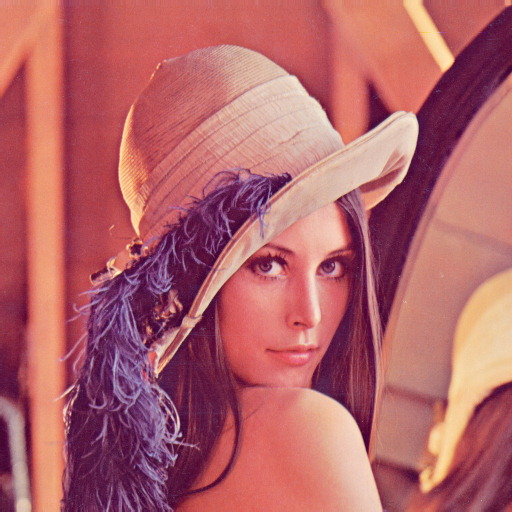

In [11]:
# Install OpenCV
!pip install opencv-python

# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import requests
import os # Import os module

# Sample image URL (using a publicly available image from OpenCV's GitHub samples)
image_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
image_path = 'lena.jpg' # Save as lena.jpg

# Initialize image to None
image = None

# Download the image with error handling and fallback
try:
    print(f"Attempting to download image from: {image_url}")
    response = requests.get(image_url, stream=True, timeout=10)
    response.raise_for_status() # Raise an exception for HTTP errors (4xx or 5xx)

    with open(image_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"Image downloaded successfully. Size: {os.path.getsize(image_path)} bytes.")

    # Check if the file exists and is not empty before trying to load with cv2.imread
    if os.path.exists(image_path) and os.path.getsize(image_path) > 0:
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: cv2.imread could not load image from {image_path}. It might be corrupted or an unsupported format.")
        else:
            print("Original Image:")
            cv2_imshow(image)
    else:
        print(f"Error: Downloaded file {image_path} is empty or does not exist.")
except requests.exceptions.RequestException as e:
    print(f"Error during image download: {e}")
    print(f"Could not download image from {image_url}. Proceeding with a dummy image for demonstration.")
    # Fallback: Create a dummy image if download fails
    dummy_image = np.zeros((300, 500, 3), dtype=np.uint8)
    cv2.putText(dummy_image, "Dummy Image (Download Failed)", (50, 150),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    image = dummy_image
    print("Original Image:")
    cv2_imshow(image)
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    print(f"Attempting to proceed with a dummy image for demonstration.")
    # Fallback: Create a dummy image if any other error occurs
    dummy_image = np.zeros((300, 500, 3), dtype=np.uint8)
    cv2.putText(dummy_image, "Dummy Image (Error)", (50, 150),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    image = dummy_image
    print("Original Image:")
    cv2_imshow(image)

# Note: Removed previous image_url and simple download logic.


Now, let's perform contour-based edge detection:

1.  **Convert to Grayscale**: Edge detection works best on single-channel images.
2.  **Apply Canny Edge Detector**: This is a multi-stage algorithm to detect a wide range of edges.
3.  **Find Contours**: Identify continuous curves along the edges.
4.  **Draw Contours**: Visualize the found contours on the original image.

Grayscale Image:


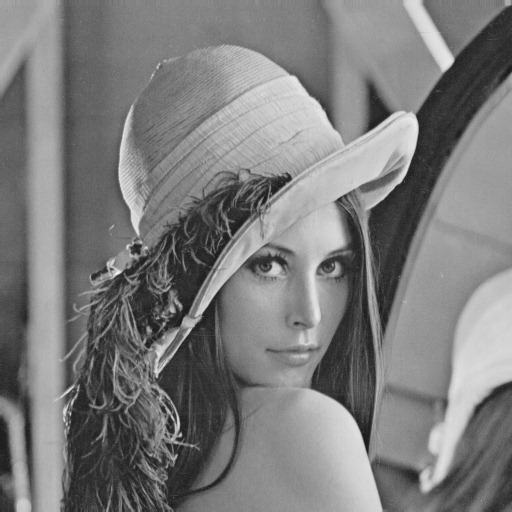

Canny Edges:


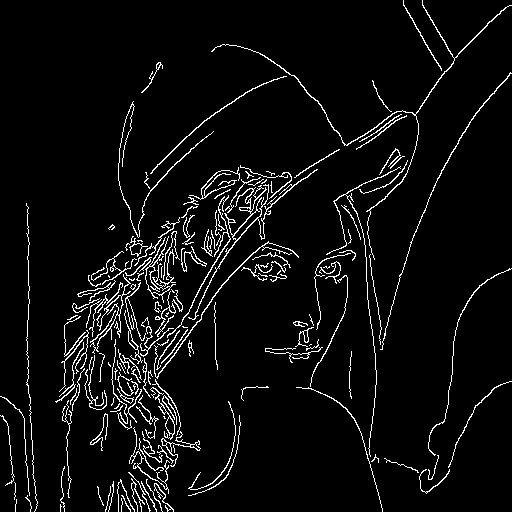

Image with Contours:


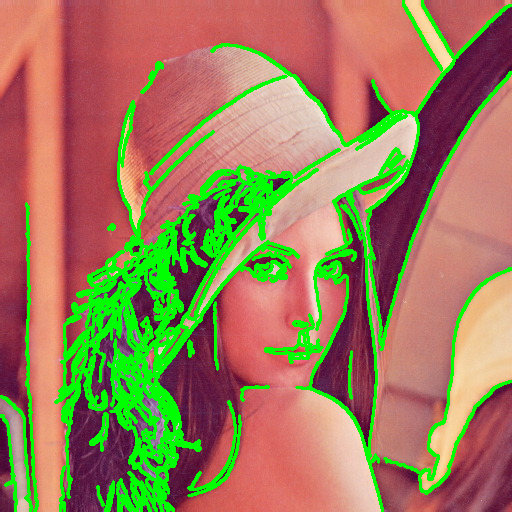

In [12]:
if image is not None:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print("Grayscale Image:")
    cv2_imshow(gray_image)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detector
    # The parameters are minVal and maxVal for the hysteresis procedure
    edges = cv2.Canny(blurred_image, 50, 150)
    print("Canny Edges:")
    cv2_imshow(edges)

    # Find contours in the edged image
    # cv2.RETR_EXTERNAL retrieves only the extreme outer contours
    # cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a copy of the original image to draw contours on
    contour_image = image.copy()

    # Draw all contours with a random color (green in this case) and thickness 2
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    print("Image with Contours:")
    cv2_imshow(contour_image)
    cv2.destroyAllWindows()
else:
    print("Cannot perform edge detection and contour finding as the image was not loaded.")
